<a href="https://colab.research.google.com/github/yagnik99/Sales_Prediction-Rossmann_Store/blob/main/Yagnik_Pandya_Team_4_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Importing required libraries

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Capstone Project 2/data/'

###Importing 1st Dataset.

In [ ]:
Rossmann_df = pd.read_csv(folder + 'Rossmann Stores Data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
Rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
Rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### Above DF contains information on various stores associated with Rossmann. It has information for sales, customers, holidays, different Promos for every weekdays with dates. 

### There are no null/ missing values.

###Let's see for how much time this data was collected. 

In [ ]:
print(Rossmann_df['Date'].min(),'- start')
print(Rossmann_df['Date'].max(), '- end')

2013-01-01 - start
2015-07-31 - end


### It is almost 2 years data.

In [ ]:
### Checking for Duplicates
Rossmann_df[Rossmann_df.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [ ]:
### Will Check sales is less than 0 for any day
Rossmann_df[Rossmann_df['Sales'] <= 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1


In [ ]:
### If store is closed and there is sale
Rossmann_df[(Rossmann_df['Open'] == 0) & (Rossmann_df['Sales'] != 0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


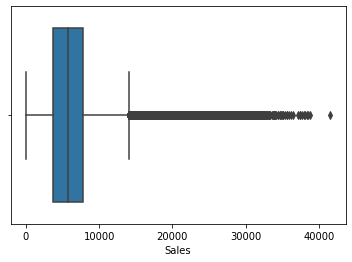

In [ ]:
sns.boxplot(Rossmann_df['Sales'])

### We have no misleading values in this dataset. i.e. No negative sales or sale when store was closed. 

### Many outliers on right side in above plot. So might be those stores are having high sales. 

### Exploring some features. 

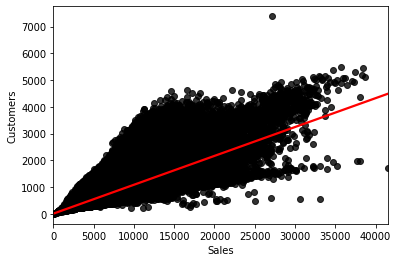

In [ ]:
# How customers affect sales
sns.regplot(x=Rossmann_df['Sales'], y=Rossmann_df['Customers'],scatter_kws={"color": "black"}, line_kws={"color": "red"})

In [ ]:
# How Sales differ in each day of week
Avg_week_sales = pd.DataFrame(Rossmann_df.groupby('DayOfWeek').agg({'Sales':'mean'}))
Avg_week_sales

,Sales
DayOfWeek,
1,7809.044510
2,7005.244467
3,6555.884138
4,6247.575913
5,6723.274305
6,5847.562599
7,204.183189


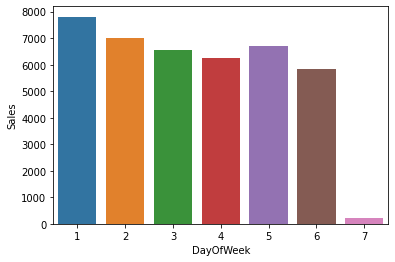

In [ ]:
sns.barplot(x=Avg_week_sales.index, y = Avg_week_sales['Sales'])

### High sales in starting of week. On Sunday almost no sale. Might be the stores are closed on that day or no customers. 

In [ ]:
Rossmann_df[(Rossmann_df['Open']==1) & (Rossmann_df['DayOfWeek']==7)]['Store'].unique()

array([  85,  122,  209,  259,  262,  274,  299,  310,  335,  353,  423,
        433,  453,  494,  512,  524,  530,  562,  578,  676,  682,  732,
        733,  769,  863,  867,  931,  948, 1045, 1081, 1097, 1099,  877])

### How sales differ with Promo

In [ ]:
Avg_Promo_sales = pd.DataFrame(Rossmann_df.groupby('Promo').agg({'Sales':'mean'}))
Avg_Promo_sales

,Sales
Promo,
0,4406.050805
1,7991.152046


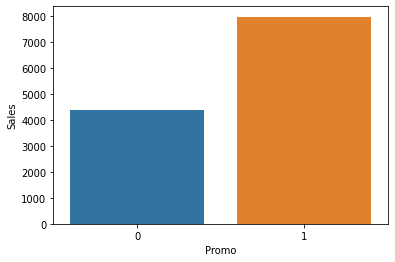

In [ ]:
sns.barplot(x=Avg_Promo_sales.index, y = Avg_Promo_sales['Sales'])

### How sales differ on holidays. 

In [ ]:
Avg_StateHoliday_sales = pd.DataFrame(Rossmann_df.groupby('StateHoliday').agg({'Sales':'mean'}))
Avg_SchoolHoliday_sales = pd.DataFrame(Rossmann_df.groupby('SchoolHoliday').agg({'Sales':'mean'}))

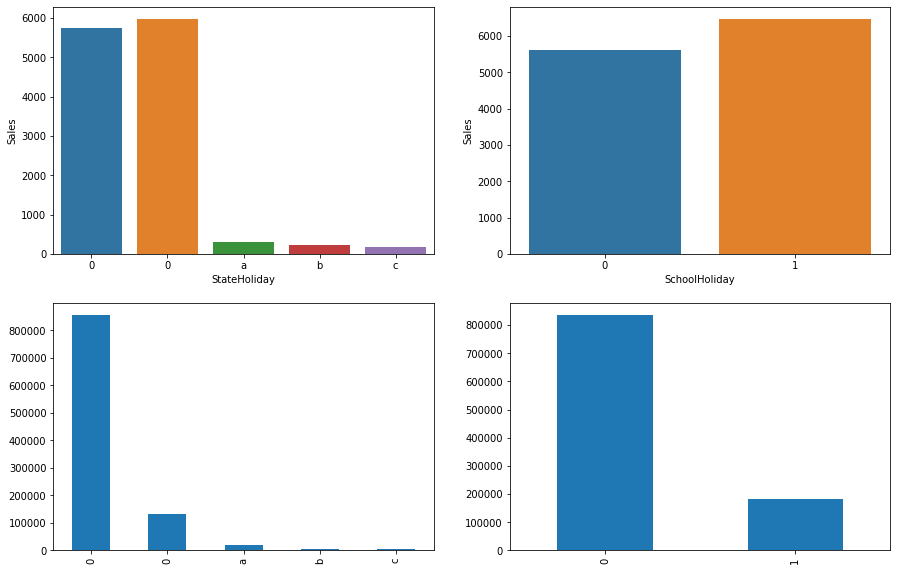

In [ ]:
# How sales differ in holidays
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Avg_StateHoliday_sales.index, y = Avg_StateHoliday_sales['Sales'])
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Avg_SchoolHoliday_sales.index, y = Avg_SchoolHoliday_sales['Sales'])

# How many Total School and State holidays
ax1=plt.subplot(2, 2,4)
Rossmann_df['SchoolHoliday'].value_counts().plot(kind='bar')
ax1=plt.subplot(2, 2,3)
Rossmann_df['StateHoliday'].value_counts().plot(kind='bar')

### NO much difference in sales on School Holidays. On state holidays all stores are to be closed except few.

### But for state holidays we have two 0 columns and others are strings. So will convert all of them to numerical. 

In [ ]:
def num_state_holidays(string):
  if string == 'a':
    return 1
  elif string == 'b':
    return 2
  elif string == 'c':
    return 3
  else:
    return 0

In [ ]:
Rossmann_df['StateHoliday'] = Rossmann_df['StateHoliday'].apply(num_state_holidays)

###We have gone through all features initially and have seen how they effect Sales. 

## **Meanwhile will see our next dataset and try to relate that dataset with this df.**

In [ ]:
#Importing Dataset
store_df = pd.read_csv(folder + 'store.csv')

In [ ]:
store_df.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###This dataset contains information on all stores. Like type of store, range of products, competitions and if store is participating in different promo and for how long.

### We have null/ missing values in some columns. Will try to deal with them first.

### Also we have store column that is common and will see if it is unique and we can merge to 1st DF.

In [ ]:
set(pd.DataFrame(Rossmann_df['Store'].value_counts()).index.to_list()) - set(pd.DataFrame(store_df['Store'].value_counts()).index.to_list())

set()

### Both have equal n same no of stores. So can merge based on this column after analysis done. 

### Check if Store participating in Promo and if no info for week, Year and Interval

In [ ]:
store_df[(store_df['Promo2'] == 1) & (store_df['Promo2SinceWeek'].isna()) ]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [ ]:
store_df[(store_df['Promo2'] == 1) & (store_df['Promo2SinceYear'].isna()) ]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [ ]:
store_df[(store_df['Promo2'] == 1) & (store_df['PromoInterval'].isna()) ]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


### No Promo, so no info and can replace Nan with 0.

In [ ]:
# Replacing Nan with 0 in below cols.
store_df.update(store_df[['Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']].fillna(0))

In [ ]:
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

###For competition distance can directly replace Nan by mean, because only 3 missing values. 

### For Month and year can not use mean or mode as there are many missing values. So will try different methods like ffill and backfill to not get same values for all those missing.

In [ ]:
# Replacing missing values in competition distance with mean
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(),inplace=True)

In [ ]:
# Replacing missing values in Competition open since month by ffill, limit = 2
store_df.fillna(method='ffill', limit = 2, inplace = True)

In [ ]:
store_df.isna().sum()

Store                         0
StoreType                     0
Assortment                    0
CompetitionDistance           0
CompetitionOpenSinceMonth    32
CompetitionOpenSinceYear     32
Promo2                        0
Promo2SinceWeek               0
Promo2SinceYear               0
PromoInterval                 0
dtype: int64

In [ ]:
# Filling rest values using backfill. So done manually
store_df.fillna(method='backfill', inplace = True)

In [ ]:
# 1 value was not filled
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(4)

In [ ]:
# 1 value was not filled. So done manually
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(2011)

In [ ]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

##Exploring Catagorical variables in Store Df.

### Store types count

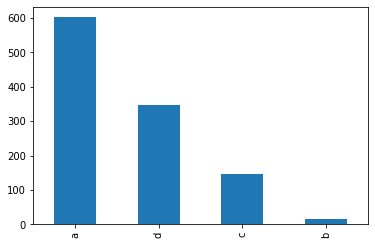

In [ ]:
store_df['StoreType'].value_counts().plot(kind='bar')

###Assortment counts

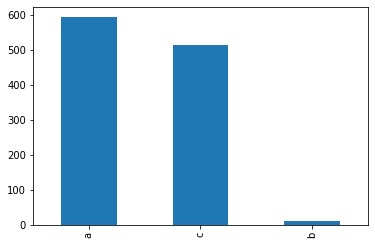

In [ ]:
store_df['Assortment'].value_counts().plot(kind='bar')

### Promo2

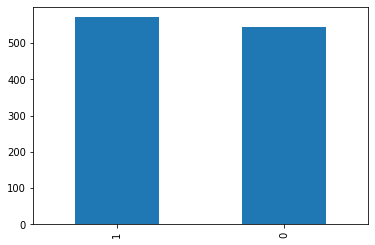

In [ ]:
store_df['Promo2'].value_counts().plot(kind='bar')

In [ ]:
store_df['PromoInterval'].value_counts()

0                   544
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

###**Feature Eng**

In [ ]:
def PromoInterval_num(string):
    if string == 'Jan,Apr,Jul,Oct':
      return 1
    elif string == 'Feb,May,Aug,Nov':
      return 2
    elif string == 'Mar,Jun,Sept,Dec':
      return 3
    else:
      return 0

In [ ]:
store_df['PromoInterval'] = store_df['PromoInterval'].apply(PromoInterval_num)

### Will merge competition since month and year by calculating total months as 1 column.

### Last record was upto 2015-07-31 in previous dataset. So will compute competition upto that only. 

In [ ]:
store_df['CompetitionOpenSinceYear'] = 2015 - store_df['CompetitionOpenSinceYear']

In [ ]:
store_df['Total_competition_months'] = (store_df['CompetitionOpenSinceYear'] * 12) -(store_df['CompetitionOpenSinceMonth']-1) + 7

In [ ]:
# Removing both original columns
store_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'],axis = 1, inplace=True)

### Doing same for Promo columns

In [ ]:
def Total_promo_year(float):
  if float == 0:
    return 0
  else:
    return int(2015 - float)

In [ ]:
def Total_promo_week(float):
  if float == 0:
    return 0
  else:
    return 28 - int(float-1)

In [ ]:
store_df['Total_promo_years'] = store_df['Promo2SinceYear'].apply(Total_promo_year)

In [ ]:
store_df['Total_promo_weeks'] = store_df['Promo2SinceWeek'].apply(Total_promo_week)

In [ ]:
store_df['Total_promo_weeks'] = (store_df['Total_promo_years']*52) + store_df['Total_promo_weeks']

In [ ]:
# Dropping other columns
store_df.drop(['Promo2SinceWeek','Promo2SinceYear','Total_promo_years'],axis=1, inplace=True)

In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Total_competition_months,Total_promo_weeks
0,1,c,a,1270.0,0,0,83.0,0
1,2,a,a,570.0,1,1,93.0,276
2,3,a,a,14130.0,1,1,104.0,223
3,4,c,c,620.0,0,0,71.0,0
4,5,a,a,29910.0,0,0,4.0,0
...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,1,1,14.0,102
1111,1112,c,c,1880.0,0,0,112.0,0
1112,1113,a,c,9260.0,0,0,112.0,0
1113,1114,a,c,870.0,0,0,112.0,0


###**Merging both Dfs**

In [ ]:
Final_df = pd.merge(Rossmann_df,store_df, on = 'Store', how = 'left')

In [ ]:
Final_df.shape

(1017209, 16)

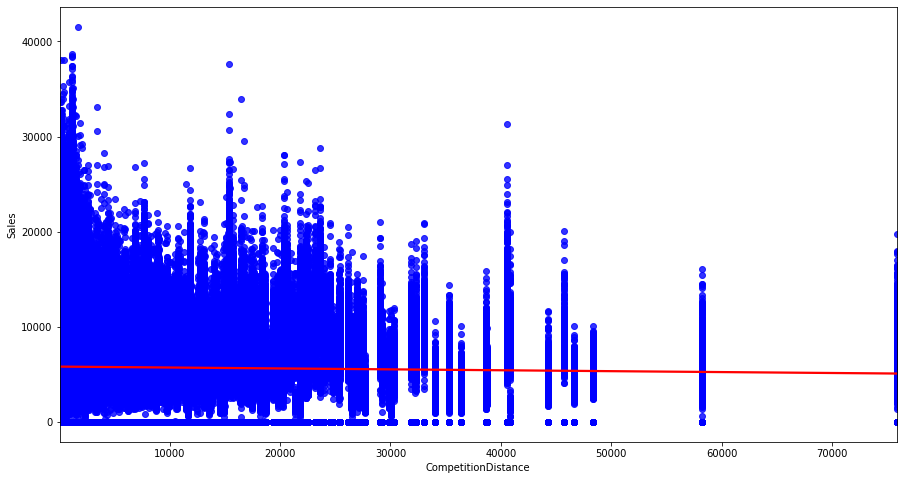

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.regplot(x=Final_df['CompetitionDistance'], y = Final_df['Sales'],scatter_kws={"color": "blue"}, line_kws={"color": "red"})

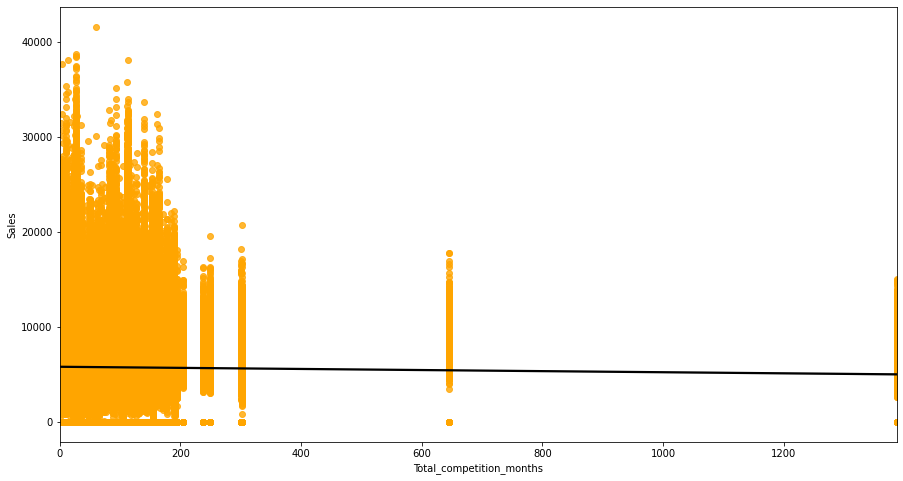

In [ ]:
sns.regplot(x=Final_df['Total_competition_months'], y = Final_df['Sales'],scatter_kws={"color": "orange"}, line_kws={"color": "black"})

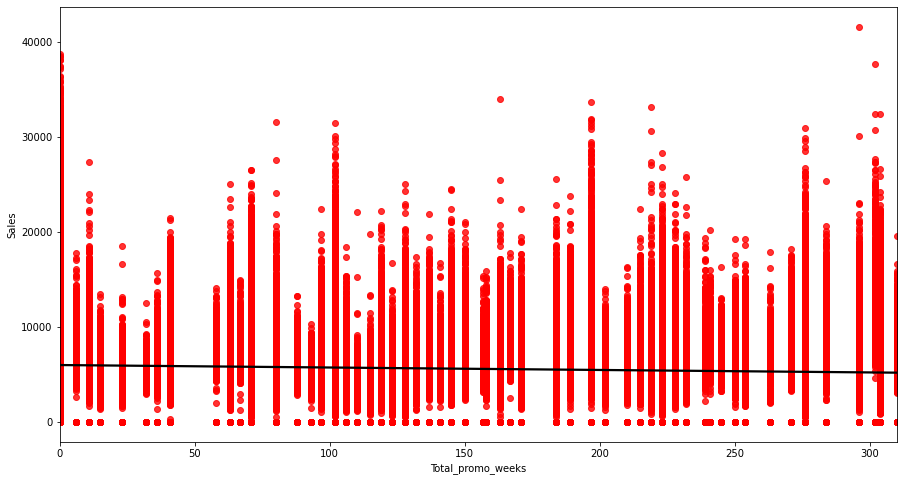

In [ ]:
sns.regplot(x=Final_df['Total_promo_weeks'], y = Final_df['Sales'],scatter_kws={"color": "red"}, line_kws={"color": "black"})

### How catagorical variables of 2nd Df effect Sales.

In [ ]:
Avg_Promo_interval_sales = pd.DataFrame(Final_df.groupby('PromoInterval').agg({'Sales':'mean'}))

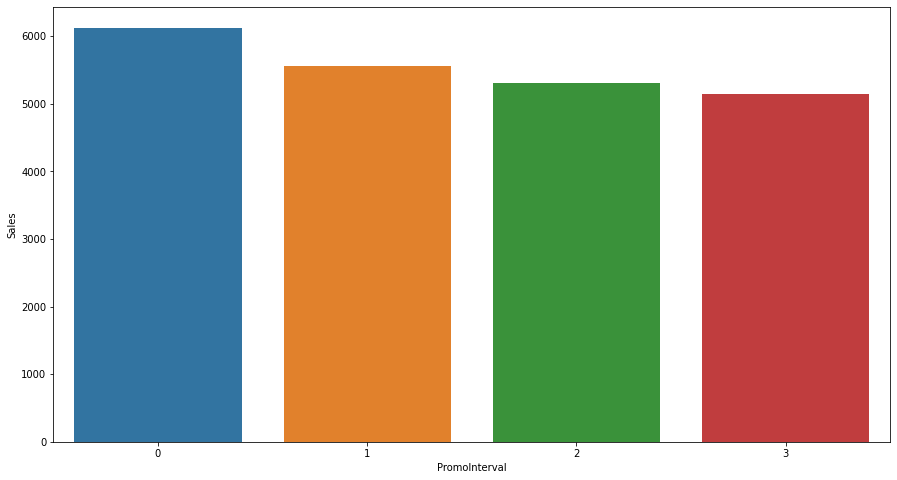

In [ ]:
sns.barplot(x=Avg_Promo_interval_sales.index, y = Avg_Promo_interval_sales['Sales'])